In [1]:
import requests 
print (requests.get('http://google.com').text)

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="eH_hRsJLlo-aH6fsruyH_A">(function(){window.google={kEI:'ziSBYuHiEJPX9APGtZbYCQ',kEXPI:'0,18168,1284368,56873,6058,207,4804,2316,383,246,5,1354,4013,1237,1122516,1197785,380706,16114,19397,9287,17572,4859,1361,9291,3027,2816,14765,4020,978,13228,3847,4193,2692,3737,22112,629,5081,1593,1279,2744,147,1103,840,1983,213,4101,3514,606,2023,1777,520,14670,3227,2845,7,17450,16320,1851,2614,12710,432,3,346,1244,1,5444,149,11325,2650,4,1528,2301,6465,577,22023,3050,2658,7357,13658,2980,1457

In [2]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.stem import WordNetLemmatizer 
import codecs

In [3]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=41eb19e6990454b8f72c16d137f13c9529140e66be95d5fe7618bff123db9b9b
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [4]:
import wikipedia as wiki

In [5]:
wiki_info = wiki.summary('The_Holocaust')
wiki_info

'The Holocaust, also known as the Shoah, was the genocide of European Jews during World War II. Between 1941 and 1945, Nazi Germany and its collaborators systematically murdered some six million Jews across German-occupied Europe; around two-thirds of Europe\'s Jewish population. The murders were carried out in pogroms and mass shootings; by a policy of extermination through labor in concentration camps; and in gas chambers and gas vans in German extermination camps, chiefly Auschwitz-Birkenau, Bełżec, Chełmno, Majdanek, Sobibór, and Treblinka in occupied Poland.Germany implemented the persecution in stages. Following Adolf Hitler\'s appointment as chancellor on 30 January 1933, the regime built a network of concentration camps in Germany for political opponents and those deemed "undesirable", starting with Dachau on 22 March 1933. After the passing of the Enabling Act on 24 March, which gave Hitler dictatorial plenary powers, the government began isolating Jews from civil society; thi

In [6]:
Holocaust = wiki.page('The_Holocaust')
Holocaust.title

'The Holocaust'

In [7]:
Holocaust.content

'The Holocaust, also known as the Shoah, was the genocide of European Jews during World War II. Between 1941 and 1945, Nazi Germany and its collaborators systematically murdered some six million Jews across German-occupied Europe; around two-thirds of Europe\'s Jewish population. The murders were carried out in pogroms and mass shootings; by a policy of extermination through labor in concentration camps; and in gas chambers and gas vans in German extermination camps, chiefly Auschwitz-Birkenau, Bełżec, Chełmno, Majdanek, Sobibór, and Treblinka in occupied Poland.Germany implemented the persecution in stages. Following Adolf Hitler\'s appointment as chancellor on 30 January 1933, the regime built a network of concentration camps in Germany for political opponents and those deemed "undesirable", starting with Dachau on 22 March 1933. After the passing of the Enabling Act on 24 March, which gave Hitler dictatorial plenary powers, the government began isolating Jews from civil society; thi

In [8]:
Holocaust.images[:5]

['https://upload.wikimedia.org/wikipedia/commons/7/7b/Austrian_Nazis_and_local_residents_watch_as_Jews_are_forced_to_scrub_the_pavement_after_Nazi_annexation.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/2/2a/Antisemitisches_Wahlplakat_CSP_1920.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/3/3e/Arrivals_and_inmates_on_the_ramp_at_Auschwitz-Birkenau%2C_summer_1944_%28Auschwitz_Album%29.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/f/f9/Auschwitz-birkenau-main_track.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/7/7b/Austrian_Nazis_and_local_residents_watch_as_Jews_are_forced_to_scrub_the_pavement_after_Nazi_annexation.jpg']

In [9]:
Holocaust.links[:5]

['/pol/',
 '11th Armoured Division (United Kingdom)',
 '11th Army (Wehrmacht)',
 '1860 civil conflict in Mount Lebanon and Damascus',
 '1920 Austrian legislative election']

In [10]:
import nltk
import string
import re

In [11]:
def text_lowercase(text):
    return text.lower()
Holocaust_lowcase = text_lowercase(wiki_info)
Holocaust_lowcase

'the holocaust, also known as the shoah, was the genocide of european jews during world war ii. between 1941 and 1945, nazi germany and its collaborators systematically murdered some six million jews across german-occupied europe; around two-thirds of europe\'s jewish population. the murders were carried out in pogroms and mass shootings; by a policy of extermination through labor in concentration camps; and in gas chambers and gas vans in german extermination camps, chiefly auschwitz-birkenau, bełżec, chełmno, majdanek, sobibór, and treblinka in occupied poland.germany implemented the persecution in stages. following adolf hitler\'s appointment as chancellor on 30 january 1933, the regime built a network of concentration camps in germany for political opponents and those deemed "undesirable", starting with dachau on 22 march 1933. after the passing of the enabling act on 24 march, which gave hitler dictatorial plenary powers, the government began isolating jews from civil society; thi

In [12]:
# Remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
 
Holocaust_numbers = remove_numbers(Holocaust_lowcase)
Holocaust_numbers

'the holocaust, also known as the shoah, was the genocide of european jews during world war ii. between  and , nazi germany and its collaborators systematically murdered some six million jews across german-occupied europe; around two-thirds of europe\'s jewish population. the murders were carried out in pogroms and mass shootings; by a policy of extermination through labor in concentration camps; and in gas chambers and gas vans in german extermination camps, chiefly auschwitz-birkenau, bełżec, chełmno, majdanek, sobibór, and treblinka in occupied poland.germany implemented the persecution in stages. following adolf hitler\'s appointment as chancellor on  january , the regime built a network of concentration camps in germany for political opponents and those deemed "undesirable", starting with dachau on  march . after the passing of the enabling act on  march, which gave hitler dictatorial plenary powers, the government began isolating jews from civil society; this included boycotting 

In [13]:
# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
 
Holocaust_punct = remove_punctuation(Holocaust_numbers)
Holocaust_punct


'the holocaust also known as the shoah was the genocide of european jews during world war ii between  and  nazi germany and its collaborators systematically murdered some six million jews across germanoccupied europe around twothirds of europes jewish population the murders were carried out in pogroms and mass shootings by a policy of extermination through labor in concentration camps and in gas chambers and gas vans in german extermination camps chiefly auschwitzbirkenau bełżec chełmno majdanek sobibór and treblinka in occupied polandgermany implemented the persecution in stages following adolf hitlers appointment as chancellor on  january  the regime built a network of concentration camps in germany for political opponents and those deemed undesirable starting with dachau on  march  after the passing of the enabling act on  march which gave hitler dictatorial plenary powers the government began isolating jews from civil society this included boycotting jewish businesses in april  and

In [14]:

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
# remove stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text
 

Holocaust_stop = remove_stopwords(Holocaust_punct)
Holocaust_stop

['holocaust',
 'also',
 'known',
 'shoah',
 'genocide',
 'european',
 'jews',
 'world',
 'war',
 'ii',
 'nazi',
 'germany',
 'collaborators',
 'systematically',
 'murdered',
 'six',
 'million',
 'jews',
 'across',
 'germanoccupied',
 'europe',
 'around',
 'twothirds',
 'europes',
 'jewish',
 'population',
 'murders',
 'carried',
 'pogroms',
 'mass',
 'shootings',
 'policy',
 'extermination',
 'labor',
 'concentration',
 'camps',
 'gas',
 'chambers',
 'gas',
 'vans',
 'german',
 'extermination',
 'camps',
 'chiefly',
 'auschwitzbirkenau',
 'bełżec',
 'chełmno',
 'majdanek',
 'sobibór',
 'treblinka',
 'occupied',
 'polandgermany',
 'implemented',
 'persecution',
 'stages',
 'following',
 'adolf',
 'hitlers',
 'appointment',
 'chancellor',
 'january',
 'regime',
 'built',
 'network',
 'concentration',
 'camps',
 'germany',
 'political',
 'opponents',
 'deemed',
 'undesirable',
 'starting',
 'dachau',
 'march',
 'passing',
 'enabling',
 'act',
 'march',
 'gave',
 'hitler',
 'dictatorial',


In [16]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()
 
# stem words in the list of tokenized words
def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return stems

stem_words(Holocaust_punct)

['the',
 'holocaust',
 'also',
 'known',
 'as',
 'the',
 'shoah',
 'wa',
 'the',
 'genocid',
 'of',
 'european',
 'jew',
 'dure',
 'world',
 'war',
 'ii',
 'between',
 'and',
 'nazi',
 'germani',
 'and',
 'it',
 'collabor',
 'systemat',
 'murder',
 'some',
 'six',
 'million',
 'jew',
 'across',
 'germanoccupi',
 'europ',
 'around',
 'twothird',
 'of',
 'europ',
 'jewish',
 'popul',
 'the',
 'murder',
 'were',
 'carri',
 'out',
 'in',
 'pogrom',
 'and',
 'mass',
 'shoot',
 'by',
 'a',
 'polici',
 'of',
 'extermin',
 'through',
 'labor',
 'in',
 'concentr',
 'camp',
 'and',
 'in',
 'ga',
 'chamber',
 'and',
 'ga',
 'van',
 'in',
 'german',
 'extermin',
 'camp',
 'chiefli',
 'auschwitzbirkenau',
 'bełżec',
 'chełmno',
 'majdanek',
 'sobibór',
 'and',
 'treblinka',
 'in',
 'occupi',
 'polandgermani',
 'implement',
 'the',
 'persecut',
 'in',
 'stage',
 'follow',
 'adolf',
 'hitler',
 'appoint',
 'as',
 'chancellor',
 'on',
 'januari',
 'the',
 'regim',
 'built',
 'a',
 'network',
 'of',
 '

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas

lemmatize_word(Holocaust_punct)

['the',
 'holocaust',
 'also',
 'know',
 'as',
 'the',
 'shoah',
 'be',
 'the',
 'genocide',
 'of',
 'european',
 'jews',
 'during',
 'world',
 'war',
 'ii',
 'between',
 'and',
 'nazi',
 'germany',
 'and',
 'its',
 'collaborators',
 'systematically',
 'murder',
 'some',
 'six',
 'million',
 'jews',
 'across',
 'germanoccupied',
 'europe',
 'around',
 'twothirds',
 'of',
 'europes',
 'jewish',
 'population',
 'the',
 'murder',
 'be',
 'carry',
 'out',
 'in',
 'pogroms',
 'and',
 'mass',
 'shoot',
 'by',
 'a',
 'policy',
 'of',
 'extermination',
 'through',
 'labor',
 'in',
 'concentration',
 'camp',
 'and',
 'in',
 'gas',
 'chamber',
 'and',
 'gas',
 'vans',
 'in',
 'german',
 'extermination',
 'camp',
 'chiefly',
 'auschwitzbirkenau',
 'bełżec',
 'chełmno',
 'majdanek',
 'sobibór',
 'and',
 'treblinka',
 'in',
 'occupy',
 'polandgermany',
 'implement',
 'the',
 'persecution',
 'in',
 'stag',
 'follow',
 'adolf',
 'hitlers',
 'appointment',
 'as',
 'chancellor',
 'on',
 'january',
 'th

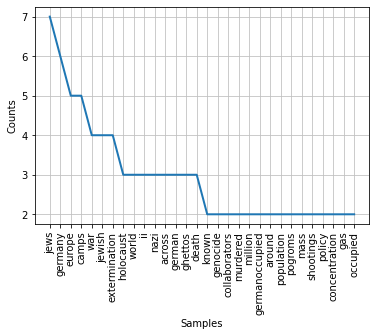

In [18]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

def graph():

    fd = nltk.FreqDist(Holocaust_stop)
    fd.plot(30,cumulative=False)

graph()

In [19]:
V = set(Holocaust_stop)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['auschwitzbirkenau']

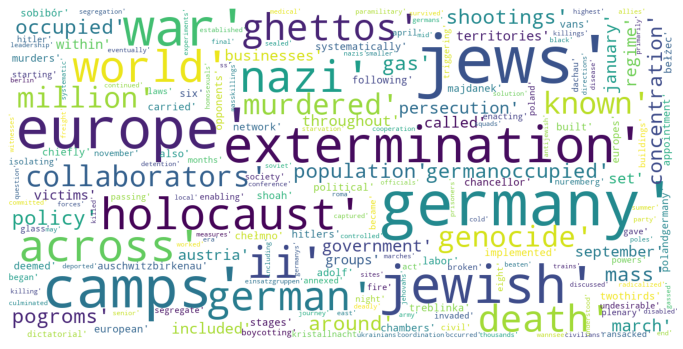

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(Holocaust_stop)